# Setup

In [3]:
import os
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt



In [4]:
import scipy
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd

# Predefined parameter

In [5]:
dirData ='./Data'

# import .wav file

In [47]:

folderList = os.listdir(dirData)
i = 6
mamalName = folderList[i]
audioFileList = os.listdir(os.path.join(dirData,mamalName))
wavPath = os.path.join(dirData , mamalName , audioFileList[0])
Fs, audio = wavfile.read(wavPath)

In [48]:
# for debugging
import IPython.display as ipd
ipd.Audio(wavPath)

In [49]:
# for debugging
#print("Sample rate: {0}Hz".format(sample_rate))
#print("Audio duration: {0}s".format(len(audio) / sample_rate))

# normalize audio signal

In [50]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio
audio = normalize_audio(audio)

In [51]:
# for debugging
folderList[i]

'Common Dolphin'

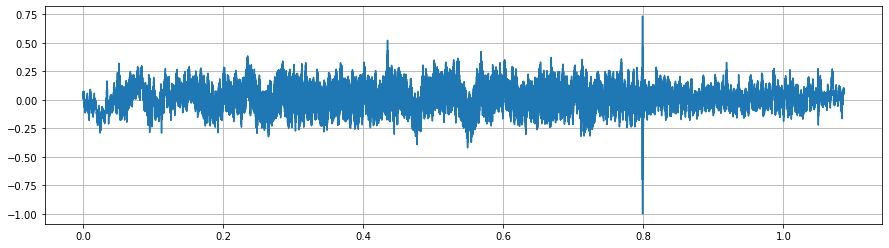

In [52]:
# for debugging
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(audio) / Fs, num=len(audio)), audio)
plt.grid(True)

In [53]:
# for debugging
import scipy.signal as signal
f, t, Sxx = signal.spectrogram(audio, fs=Fs, nperseg=512, nfft=2048)
Sxx_dB = 20*np.log10(Sxx+1e-10)

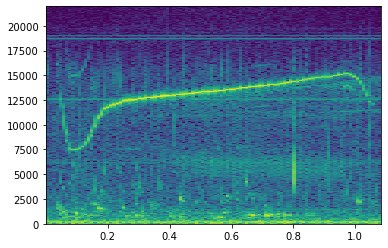

In [54]:
# for debugging
plt.pcolormesh(t,f,Sxx_dB)

In [22]:
Fs

18000

In [167]:
def AudioFrame (audio, sizeFFT=2048, sizeHop=10, Fs=44100):
    audio = np.pad(audio, int(sizeFFT / 2), mode='reflect')
    lenFrame = np.round(Fs * sizeHop / 1000).astype(int)
    numFrame = int((len(audio) - sizeFFT) / lenFrame) + 1
    frames = np.zeros((numFrame,sizeFFT))
    
    for n in range(numFrame):
        frames[n] = audio[n*lenFrame:n*lenFrame+sizeFFT]
    
    return frames


In [168]:
 audioFrames = AudioFrame (audio, sizeFFT=2048, sizeHop=30, Fs=Fs)

In [157]:
# for debugging
len(frames)

131

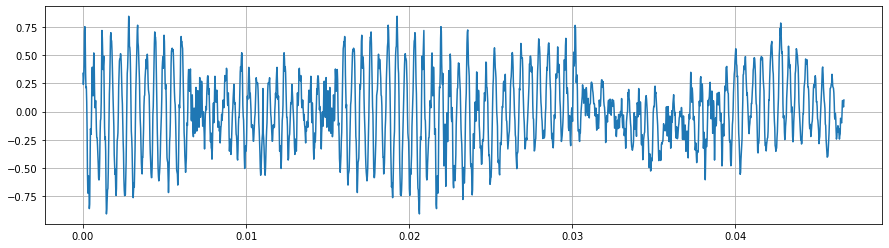

In [158]:
# for debugging
frame = audioFrames[1]

plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(frame) / sample_rate, num=len(frame)), frame)
plt.grid(True)

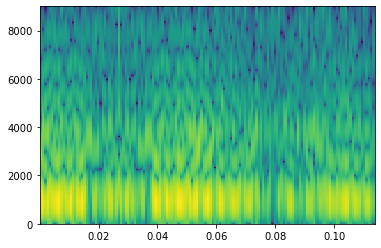

In [159]:
# for debugging
f, t, Sxx = signal.spectrogram(frame, fs=Fs, nperseg=16, nfft=2048)
Sxx_dB = 20*np.log10(Sxx+1e-10)
plt.pcolormesh(t,f,Sxx_dB)

# window

In [169]:
from scipy.signal import get_window
sizeFFT=2048
window = get_window("hann", sizeFFT, fftbins=True)
audio_win = audioFrames * window

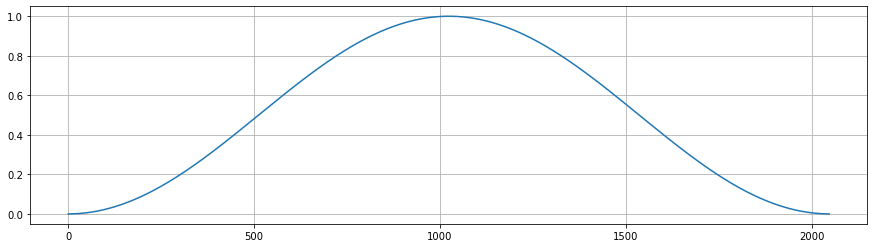

In [165]:
# for debugging
plt.figure(figsize=(15,4))
plt.plot(window)
plt.grid(True)

In [186]:

plt.figure(figsize=(15,4))
plt.plot(audio_win[1])
plt.grid(True)

NameError: name 'AudioWindow' is not defined

# Mel Scal

In [175]:
# mel frequancy

def freq_to_mel(freq):
    return 2595.0 * np.log10(1.0 + freq / 700.0)

def met_to_freq(mels):
    return 700.0 * (10.0**(mels / 2595.0) - 1.0)


def get_filter_points(frqMin, frqMax, num_MelPoints, sizeFFT, Fs):
    melMin = freq_to_mel(frqMin)
    melMax = freq_to_mel(frqMax)
    
    mels = np.linspace(melMin, melMax, num=num_MelPoints+2)
    freqs = met_to_freq(mels)
    
    return np.floor((sizeFFT + 1) / Fs * freqs).astype(int), freqs


# frqMin = 0
# frqMax = Fs / 2
# num_MelPoints = 10
melPoints, melFrq = get_filter_points(0, Fs/2, 10, sizeFFT, Fs) # mel frequancy

In [183]:
melPoints

array([   0,   21,   48,   83,  127,  183,  254,  344,  459,  604,  789,
       1024])

In [179]:
def get_filters(melPoints, melFrq,sizeFFT):
    melFilters = np.zeros((len(melPoints)-2,int(1+sizeFFT/2)))
    
    # filter shap triangular
    for n in range(len(melPoints)-2):
        melFilters[n, melPoints[n] : melPoints[n + 1]] = np.linspace(0, 1, melPoints[n + 1] - melPoints[n]) # incline line or ramp shape
        melFilters[n, melPoints[n + 1] : melPoints[n + 2]] = np.linspace(1, 0, melPoints[n + 2] - melPoints[n + 1]) # decline or sawtooth
    
    enorm = 2.0 / (melFrq[2:len(melFrq)] - melFrq[:len(melFrq)-2])
    melFilters *= enorm[:, np.newaxis]
    return melFilters

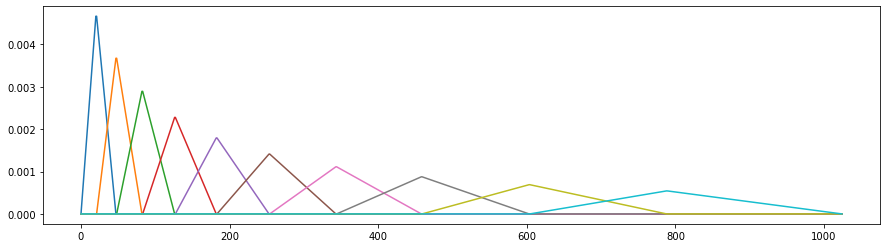

In [180]:
melFilters = get_filters(melPoints, melFrq, sizeFFT)
plt.figure(figsize=(15,4))
for n in range(melFilters.shape[0]):
    plt.plot(melFilters[n])

In [184]:
def melSpecrum(audioWindow,sizeFFT,Fs):
    audioPower = AudioFFT(audioWindow,sizeFFT) # fft or fft-power
    melPoints, melFrq = get_filter_points(0, Fs/2, 10, sizeFFT, Fs) 
    melFilters = get_filters(melPoints, melFrq, sizeFFT)
    #
    audio_filtered = np.dot(melFilters, np.transpose(audioPower))
    audio_log = 10.0 * np.log10(audio_filtered)

In [187]:

        melSpecrum(audio_win,sizeFFT,Fs)

NameError: name 'AudioFFT' is not defined

# python_speech_features (not working)

In [178]:
from python_speech_features import mfcc

mfcc_feat = mfcc(audio,Fs)
mfcc_data= mfcc_feat.T
plt.imshow(mfcc_data, cmap=plt.cm.jet, aspect='auto',origin='lower')


ModuleNotFoundError: No module named 'python_speech_features'